<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [24]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


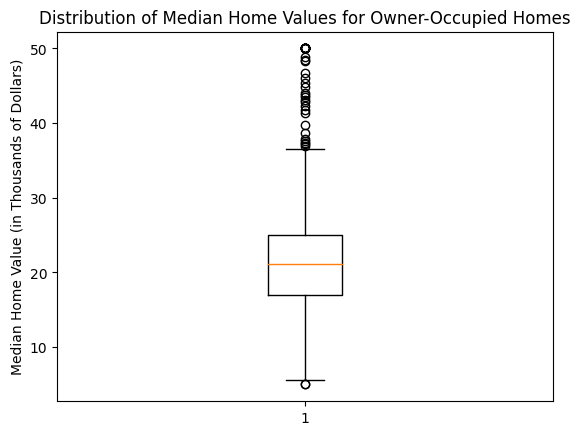

In [8]:
pyplot.boxplot(boston_df['MEDV'],)
# Personalizar el boxplot 
pyplot.title('Distribution of Median Home Values for Owner-Occupied Homes')
pyplot.ylabel('Median Home Value (in Thousands of Dollars)')
pyplot.show()

# Conlusion : 
## Comparing the boxplot to the descriptive stats in the table above, we see that the 50% quartile is 21.2, the 25% quartile is 17.02, the 75% quartile is 25

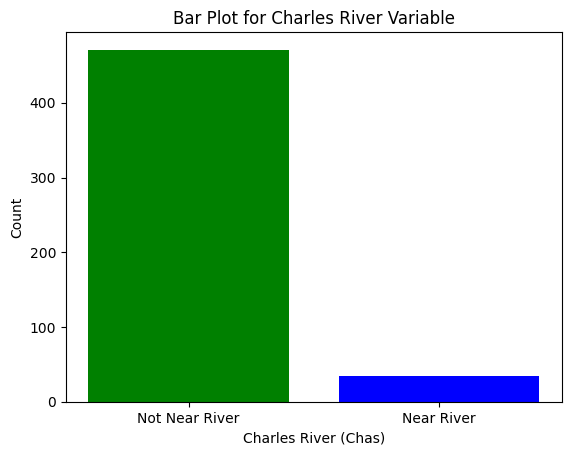

Index([0.0, 1.0], dtype='float64', name='CHAS')

In [9]:
# Count the occurrences of each unique value in 'Chas'
chas_counts = boston_df['CHAS'].value_counts()

# Create a bar plot
pyplot.bar(chas_counts.index, chas_counts.values, color=['green', 'blue'])

# Customize the bar plot (optional)
pyplot.title('Bar Plot for Charles River Variable')
pyplot.xlabel('Charles River (Chas)')
pyplot.ylabel('Count')
pyplot.xticks(chas_counts.index, labels=['Not Near River', 'Near River'])
pyplot.show()
chas_counts.index

In [10]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

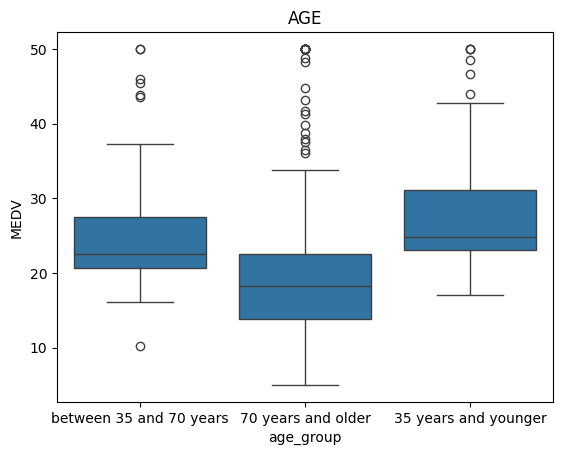

In [11]:
ax = sns.boxplot(y='MEDV', x='age_group', data=boston_df)
ax.set_title("AGE") 
pyplot.show()

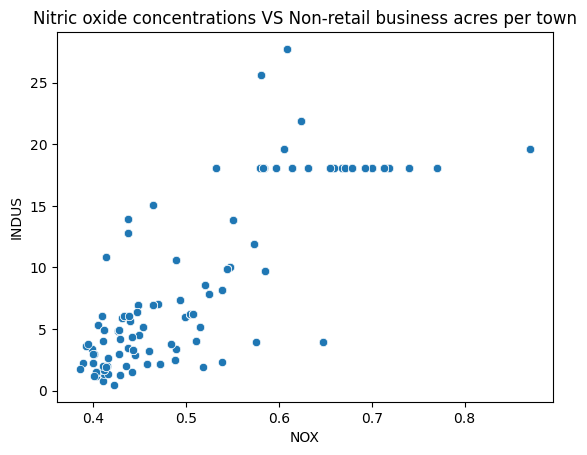

In [12]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_title("Nitric oxide concentrations VS Non-retail business acres per town") 
pyplot.show()

# Conclusion: 
## There is a positive reltionship between NOX and IDUS. There is an upward trend in NOX as the number on IDUS increases. Lets calculate the Pearson r correlation coefficient to confirm:"

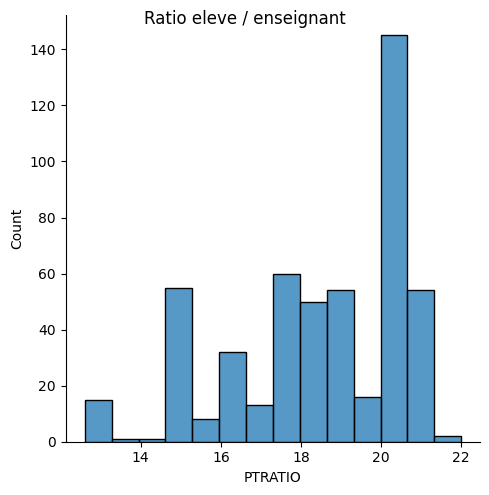

In [13]:
ax = sns.displot(x='PTRATIO', data=boston_df, kde = False)
ax.fig.suptitle("Ratio eleve / enseignant")
pyplot.show()

In [14]:
#T TEST 
# Existe-t-il une différence significative dans la valeur médiane des maisons bordées par 
# la rivière Charles ou non ? (Test T pour les échantillons indépendants)

from scipy.stats import ttest_ind
chas_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = ttest_ind(chas_bounded, chas_not_bounded)
print('p-value:', p_value)

p-value: 7.390623170519905e-05


In [ ]:
#State the hypothesis

#*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
#*   $H\_1:$ At least one of the means differ


In [15]:
# anova
#Y a-t-il une différence dans les valeurs médianes des maisons (MEDV) pour chaque proportion 
#d'unités occupées par le propriétaire et construites avant 1940 (AGE) ? (ANOVA)

scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [16]:
boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

1      21.6
7      27.1
8      16.5
9      18.9
10     15.0
       ... 
500    16.8
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 287, dtype: float64

In [17]:
a_35_years_and_younger    = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
between_35_and_70_years = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
a_70_years_and_older      = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(a_35_years_and_younger, between_35_and_70_years, a_70_years_and_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


# Conclusion: 
## For alpha = 0.05: The p-value is smaller than 0.05, thus we reject the null hypothesis and conclude that there is a difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE) for the age groups

In [22]:
#PEARSON 
#Peut-on conclure qu'il n'y a pas de relation entre les concentrations d'oxyde nitrique et la proportion 
#d'hectares de commerces autres que de détail par ville (corrélation de Pearson) ?

from scipy.stats import pearsonr

corr_coeff, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Check the correlation coefficient and p-value
print('Pearson Cor Coeff:', corr_coeff)
print('p-value:', p_value)

Pearson Cor Coeff: 0.7636514469209192
p-value: 7.913361061210442e-98


# Conclusion: 
## The Pearson r coefficient is 0.763 indicating a strong positive relationship between NOX and INDU. Furthermore, the p-value is very small and less then 0.01. Hence, indicating that there is definitely a relationship between NOX and INDU.

Intercept (beta_0): 18.39008833049338
Coefficient for DIS (beta_1): 1.0916130158411106


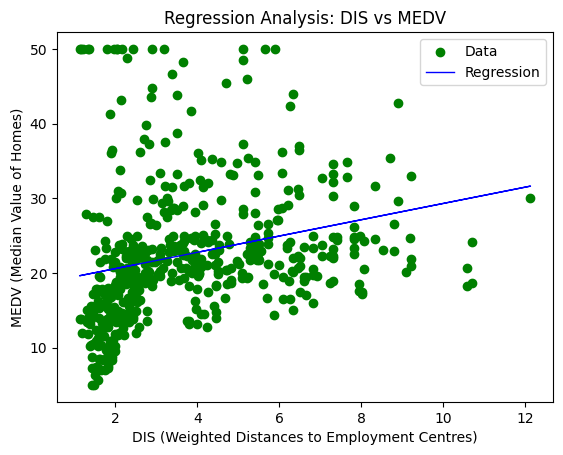

In [30]:
X = boston_df[['DIS']]  # Independent variable
y = boston_df['MEDV']     # Dependent variable

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Obtain coefficients
beta_0 = model.intercept_
beta_1 = model.coef_[0]

# Print coefficients
print('Intercept (beta_0):', beta_0)
print('Coefficient for DIS (beta_1):', beta_1)

# Plot the regression line
pyplot.scatter(X, y, color='green', label='Data')
pyplot.plot(X, model.predict(X), color='blue', linewidth=1, label='Regression')
pyplot.title('Regression Analysis: DIS vs MEDV')
pyplot.xlabel('DIS (Weighted Distances to Employment Centres)')
pyplot.ylabel('MEDV (Median Value of Homes)')
pyplot.legend()
pyplot.show()

# Conclusion: 
## For alpha = 0.05: The p-value is smaller than 0.05, thus we reject the null hypothesis and conclude that DIS has an impact on MEDV. The DIS coefficient is positive, hence MEDV increases as DIS increases.